[28.256917499346823, 49.395194416114194, 73.00131054183669, 108.21460024877592]
[10.802776765413334, 24.965700100380573, 36.12014011438374, 46.276200188008104]
[23.586256171008664, 49.23485305086191, 75.34721326755071, 94.79633350885805]
[15.016340023004632, 24.631583100832206, 41.27451959923787, 46.33230954955837]

[1.9124817258441171, 4.420151625603061, 6.108896279651606, 9.555373090399641]
[0.7534630699503633, 1.9853439443642602, 2.512705399261478, 3.643795290394339]
[1.8230922644257905, 3.9987697909329483, 6.405714199154152, 7.834407728004799]
[1.0584204421501064, 1.5564981422326831, 3.3762388220235477, 3.0888206366372244]
---------------Geradenfit----------------
List Works
x_strich = 34.49618866971527
y_strich = 36.96878614453731
x2_strich =1543.007765465969
xy_strich = 1613.9189074690667
----------------------------------------------------------------------------
Steigung: m = 0.9592543846322713
y-Achsenabschnitt: b = 3.878165910010847
Sigma y: sigmay = 11.03948022379572
Fehler 

/tmp/ipykernel_32117/3921090209.py:18: RuntimeWarning: divide by zero encountered in divide
  return n / (np.sum(1 / val ** 2))


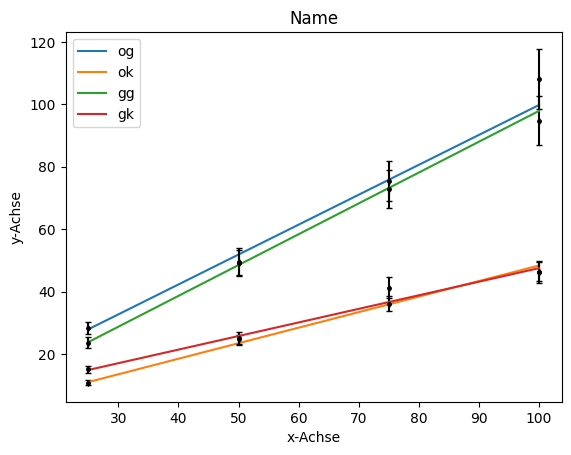

---------------Geradenfit----------------
List Works
x_strich = 1.5937941199538705
y_strich = 6.560473646036103
x2_strich =2.7930324805898423
xy_strich = 11.29160854138709
----------------------------------------------------------------------------
Steigung: m = 3.304548234340781
y-Achsenabschnitt: b = 1.2937041010398191
Sigma y: sigmay = 0.07465406208249933
Fehler Steigung: dm = 0.27168324537600264
Fehler y-Achsenabschnitt db = 0.454047040778947
----------------------------------------------------------------------------
----------------------------------------------------------------------------
---------------Geradenfit----------------
List Works
x_strich = 7.319514413800462
y_strich = 4.405202319604772
x2_strich =58.572846217119576
xy_strich = 35.20226610465258
----------------------------------------------------------------------------
Steigung: m = 0.5919543161267318
y-Achsenabschnitt: b = 0.07238417040376612
Sigma y: sigmay = 0.028927635260199945
Fehler Steigung: dm = 0.03804062

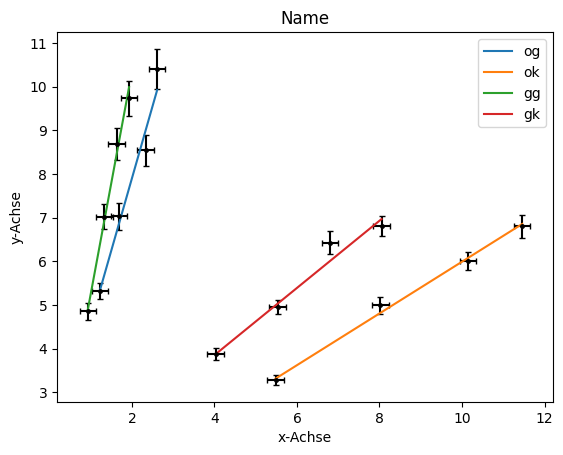

In [3]:
## import math
import numpy as np
import matplotlib.pyplot as plt
import math

def geradenfit(x, y, x_err, y_err, lab):
    print('---------------Geradenfit----------------')
    # Mittelwert
    def mittel(x, n):
        return (1 / n) * np.sum(x)

    # varianzgewichteter Mittelwert
    def mittel_var(val, z):
        return np.sum(z / (val ** 2)) / np.sum(1 / (val ** 2))

    # varianzgemittelte Standardabweichung
    def sigma(val, n):
        return n / (np.sum(1 / val ** 2))

    # gerade
    def polynom(m, b, x):
        return m * x + b

    if len(x)==len(y):
        n = len(x)
        print('List Works')
    else:
        print('x and y are not the same length')

    x_strich = mittel_var(y_err, x)
    x2_strich = mittel_var(y_err,x ** 2)
    y_strich = mittel_var(y_err,y)
    xy_strich = mittel_var(y_err,x * y)
    print(f'{x_strich = }')
    print(f'{y_strich = }')
    print(f'{x2_strich =}')
    print(f'{xy_strich = }')
    print('----------------------------------------------------------------------------')
    m = (xy_strich - (x_strich * y_strich)) / (x2_strich - x_strich ** 2)
    b = (x2_strich * y_strich - x_strich * xy_strich) / (x2_strich - x_strich ** 2)
    print(f'Steigung: {m = }')
    print(f'y-Achsenabschnitt: {b = }')

    sigmax = sigma(x_err, n)
    sigmay = sigma(y_err, n)

    dm = np.sqrt(sigmay / (n * (x2_strich - x_strich ** 2)))
    db = np.sqrt(sigmay * x2_strich / (n * (x2_strich - (x_strich ** 2))))
    print(f'Sigma y: {sigmay = }')
    print(f'Fehler Steigung: {dm = }')
    print(f'Fehler y-Achsenabschnitt {db = }')
    print('----------------------------------------------------------------------------')
    # create dictionary for further calculations
    dict = {
        'm':m,
        'b':b,
        'dm':dm,
        'db':db,
    }
    
    # plot
    print('----------------------------------------------------------------------------')
    #fig, ax = plt.subplots()
    plt.title('Name')
    plt.ylabel(r'y-Achse')
    plt.xlabel(r'x-Achse')
    plt.errorbar(x, y, xerr=x_err, yerr=y_err, capsize=2, fmt='.', markersize=5, color='black')
    #plt.plot(x, polynom(m,b,x), label =lab)
    plt.plot(x, m * x + b, label=lab)#f'$y = ({m:0.3e})x+({b:+0.3e})$')
    plt.legend()
    
#============================================================================================================
#============================================================================================================
dt = 0.4

#daten
h = [25,50,75,100]

#kleines Rad, große Masse
#Anzahl der Umdrehung und Periodendauer
mgn = [10,10,13,15]
mgt = [11.82/10, 8.94/10, 9.56/13, 9.06/15]

#omega und omega2
og = [2*math.pi/i for i in mgt]
o2g = [i*i for i in og]

#fehler für omega und omega2
err = [(dt/mgn[i])*2*math.pi/(mgt[i]*mgt[i]) for i in range(len(mgt))]
err2 = [err[n]*2*i for n,i in enumerate(og)]

#kleines Rad, kleine Masse
mkn = [6,8,11,11]

mkt = [11.47/6, 10.06/8, 11.5/11, 10.16/11]
ok = [2*math.pi/i for i in mkt]
o2k = [i*i for i in ok]
erk = [(dt/mkn[i])*2*math.pi/(mkt[i]*mkt[i]) for i in range(len(mkt))]
erk2 = [erk[n]*2*i for n,i in enumerate(ok)]

#großes Rad, große Masse
ggn = [8, 11, 13, 15]

ggt = [10.35/8, 9.85/11, 9.41/13, 9.68/15]
ogg = [2*math.pi/i for i in ggt]
o2gg = [i*i for i in ogg]
erg = [(dt/ggn[i])*2*math.pi/(ggt[i]*ggt[i]) for i in range(len(ggt))]
erg2 = [erg[n]*2*i for n,i in enumerate(ogg)]

#großes Rad, kleine Masse
gkn = [7, 10, 10 ,13]

gkt = [11.35/7, 12.66/10, 9.78/10, 12/13]
ogk = [2*math.pi/i for i in gkt]
o2gk = [i*i for i in ogk]
egk = [(dt/gkn[i])*2*math.pi/(gkt[i]*gkt[i]) for i in range(len(gkt))]
egk2 = [egk[n]*2*i for n,i in enumerate(ogk)]

print(o2g)
print(o2k)
print(o2gg)
print(o2gk)
print()
print(err2)
print(erk2)
print(erg2)
print(egk2)

geradenfit(np.asarray(h), np.asarray(o2g), np.asarray([0]), np.asarray(err2), "og")
geradenfit(np.asarray(h), np.asarray(o2k), np.asarray([0]), np.asarray(erk2), "ok")
geradenfit(np.asarray(h), np.asarray(o2gg), np.asarray([0]), np.asarray(erg2), "gg")
geradenfit(np.asarray(h), np.asarray(o2gk), np.asarray([0]), np.asarray(egk2), "gk")
plt.show()

mg = [1.22, 1.69, 2.33, 2.61]
geradenfit(np.asarray(mg), np.asarray(og), np.full(len(og), 0.2), np.asarray(err), "og")
mk = [5.48, 8.02, 10.14, 11.46]
geradenfit(np.asarray(mk), np.asarray(ok), np.full(len(og), 0.2), np.asarray(erk), "ok")
gg = [0.93, 1.33, 1.63, 1.93]
geradenfit(np.asarray(gg), np.asarray(ogg), np.full(len(og), 0.2), np.asarray(erg), "gg")
gk = [4.03, 5.53, 6.80, 8.05]
geradenfit(np.asarray(gk), np.asarray(ogk), np.full(len(og), 0.2), np.asarray(egk), "gk")


print(ok)
print(og)
print(ogk)
print(ogg)
print()
print(mk)
print(mg)
print(gk)
print(gg)

##### 